# Example – identifying risky bank loans using random forests

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Step 1 – collecting data

In [2]:
df = pd.read_csv('10 credit.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

# Step 2 – exploring and preparing the data

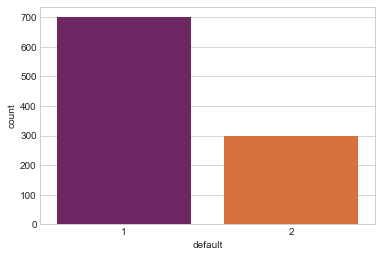

In [3]:
#The default vector indicates whether the loan applicant was unable to meet the agreed payment terms and went into default. 
#A total of 30 percent of the loans in this dataset went into default:
sns.countplot('default',data=df,palette='inferno')

In [4]:
df.select_dtypes(include=['int64']).describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.300000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
df.select_dtypes(include=['object']).describe()

,checking_balance,credit_history,purpose,savings_balance,employment_length,personal_status,other_debtors,property,installment_plan,housing,telephone,foreign_worker,job
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,2,2,4
top,unknown,repaid,radio/tv,< 100 DM,1 - 4 yrs,single male,none,other,none,own,none,yes,skilled employee
freq,394,530,280,603,339,548,907,332,814,713,596,963,630


In [6]:
cat_feats = ['checking_balance','credit_history','purpose','savings_balance','employment_length',
             'personal_status','other_debtors','property','installment_plan','housing','telephone','foreign_worker','job']
df = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [7]:
#Data preparation – creating random training and test datasets
df['default_flag'] = df['default'].apply(lambda x: 0 if x == 1 else 1)
x = df.drop(['default_flag','default'],axis=1)
y = df['default_flag']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=123)

# Step 3 – training a model on the data

In [8]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Step 4 – evaluating model performance

In [9]:
y_pred = rfc.predict(x_test)

print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('classification_report')
print(classification_report(y_test,y_pred))

confusion_matrix
[[60  6]
 [17 17]]


classification_report
             precision    recall  f1-score   support

          0       0.78      0.91      0.84        66
          1       0.74      0.50      0.60        34

avg / total       0.77      0.77      0.76       100

